In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## grid_silver, grid_kid 생성

In [2]:
grid = pd.read_csv('grid_data.csv')
grid

,Unnamed: 0,x_index,y_index,격자 당 경로당 수,geometry,행정동,격자 당 어린이 보육시설 수
0,0,0,22,0,"POLYGON ((127.0561797939232 37.53325271346528,...",자양4동,0
1,1,0,23,0,POLYGON ((127.05619047599266 37.53145004424569...,자양4동,0
2,2,0,24,0,POLYGON ((127.05620115711046 37.52964737447184...,자양4동,0
3,3,0,25,0,POLYGON ((127.05621183727676 37.52784470414376...,자양4동,0
4,4,1,20,0,POLYGON ((127.05842217001221 37.53686653680621...,자양4동,0
...,...,...,...,...,...,...,...
478,478,25,8,0,POLYGON ((127.11264035105809 37.55868932524784...,광장동,0
479,479,25,9,0,POLYGON ((127.11264968278773 37.55688665089398...,광장동,0
480,480,25,10,0,POLYGON ((127.11265901368601 37.55508397598633...,광장동,0
481,481,25,11,0,POLYGON ((127.11266834375294 37.55328130052497...,광장동,0


In [3]:
ks = pd.read_csv('kids_silvers_rate.csv')
ks.columns = ['행정동','유아(만0~7세)','노인(만65세이상)','총인구','유아비율(%)','노인비율(%)']
ks = ks.loc[:,['행정동', '유아비율(%)', '노인비율(%)']]
ks = ks.iloc[1:,:]
ks['행정동'] = ['중곡1동', '중곡2동', '중곡3동', '중곡4동', '능동', '구의1동', '구의2동', '구의3동', '광장동', 
            '자양1동', '자양2동', '자양3동', '자양4동', '화양동', '군자동']
ks

,행정동,유아비율(%),노인비율(%)
1,중곡1동,3.137460,17.118766
2,중곡2동,3.295395,16.238869
3,중곡3동,3.267482,18.419567
4,중곡4동,3.146067,19.300874
5,능동,3.533095,14.919499
6,구의1동,3.121392,14.161714
7,구의2동,4.239143,17.286795
8,구의3동,4.537237,15.483322
9,광장동,5.025170,11.665886
10,자양1동,2.643857,16.562986


In [4]:
grid = pd.merge(grid, ks, how='outer')
grid_silver = grid.loc[:,['노인비율(%)','격자 당 경로당 수']]
grid_kid = grid.loc[:,['유아비율(%)','격자 당 어린이 보육시설 수']]

## scatter plot

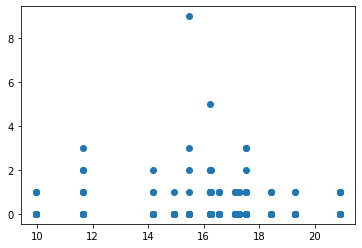

In [5]:
plt.scatter(grid_silver['노인비율(%)'], grid_silver['격자 당 경로당 수'])

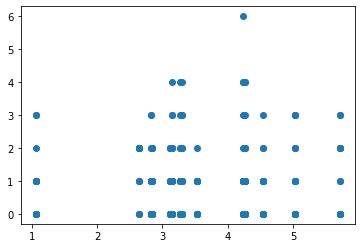

In [6]:
plt.scatter(grid_kid['유아비율(%)'], grid_kid['격자 당 어린이 보육시설 수'])

In [7]:
clustering_df = pd.concat([grid_silver, grid_kid], axis=1)

In [8]:
clustering_df

,노인비율(%),격자 당 경로당 수,유아비율(%),격자 당 어린이 보육시설 수
0,20.913757,0,2.839451,0
1,20.913757,0,2.839451,0
2,20.913757,0,2.839451,0
3,20.913757,0,2.839451,0
4,20.913757,0,2.839451,0
...,...,...,...,...
478,11.665886,0,5.025170,0
479,11.665886,0,5.025170,0
480,11.665886,0,5.025170,0
481,11.665886,0,5.025170,0


## 히트맵 상관관계 분석

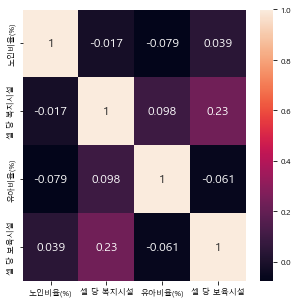

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
clustering_df.columns = ['노인비율(%)', '셀 당 복지시설', '유아비율(%)', '셀 당 보육시설']
corr = clustering_df.corr()
plt.figure(figsize=(5,5))
plt.rc('font',family='Malgun Gothic', size=8)
sns.heatmap(corr, annot=True, annot_kws={"size": 12})

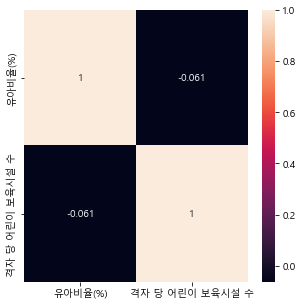

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = grid_kid.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True)

In [11]:
grid_kid

,유아비율(%),격자 당 어린이 보육시설 수
0,2.839451,0
1,2.839451,0
2,2.839451,0
3,2.839451,0
4,2.839451,0
...,...,...
478,5.025170,0
479,5.025170,0
480,5.025170,0
481,5.025170,0


## standard scaler 정규화

In [12]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용하여 표준 정규 분포를 가지는 값들로 변환
grid_silver_scaled = StandardScaler().fit_transform(grid_silver)
grid_kid_scaled = StandardScaler().fit_transform(grid_kid)

In [13]:
grid_silver['노인비율(%)'] = grid_silver_scaled[:,0]
grid_silver['격자 당 경로당 수'] = grid_silver_scaled[:,1]
grid_kid['유아비율(%)'] = grid_kid_scaled[:,0]
grid_kid['격자 당 어린이 보육시설 수'] = grid_kid_scaled[:,1]

## PCA(사용하지 않음)

In [14]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=1)

# #fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
# pca.fit(grid_silver_scaled)
# grid_silver_pca = pca.transform(grid_silver_scaled)
# print(grid_silver_pca.shape)

In [15]:
# # PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
# pca_columns=['pca1']
# grid_silverDF_pca = pd.DataFrame(grid_silver_pca, columns=pca_columns)
# grid_silverDF_pca

In [16]:
# print(pca.explained_variance_ratio_)

In [17]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=1)

# #fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
# pca.fit(grid_kid_scaled)
# grid_kid_pca = pca.transform(grid_kid_scaled)
# print(grid_kid_pca.shape)

In [18]:
# # PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
# pca_columns=['pca1']
# grid_kidDF_pca = pd.DataFrame(grid_kid_pca, columns=pca_columns)
# grid_kidDF_pca

In [19]:
# print(pca.explained_variance_ratio_)

## K-means clustering

In [20]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

In [21]:
clustering_df = pd.concat([grid_silver, grid_kid], axis=1)
clustering_df

,노인비율(%),격자 당 경로당 수,유아비율(%),격자 당 어린이 보육시설 수
0,1.573096,-0.263779,-0.765451,-0.549261
1,1.573096,-0.263779,-0.765451,-0.549261
2,1.573096,-0.263779,-0.765451,-0.549261
3,1.573096,-0.263779,-0.765451,-0.549261
4,1.573096,-0.263779,-0.765451,-0.549261
...,...,...,...,...
478,-1.416842,-0.263779,1.144370,-0.549261
479,-1.416842,-0.263779,1.144370,-0.549261
480,-1.416842,-0.263779,1.144370,-0.549261
481,-1.416842,-0.263779,1.144370,-0.549261


In [22]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, clustering_df): 
    X_features = clustering_df.copy()
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=4)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        X_features['label'] = cluster_labels
        X_features['silhouette_coeff'] = sil_values
        gb = X_features.groupby('label')['silhouette_coeff'].mean()
        print(gb)
        val = np.var(gb)
        print('val: ',val)
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

label
0    0.081841
1    0.426510
2    0.301154
Name: silhouette_coeff, dtype: float64
val:  0.020289853358489235
label
0    0.424976
1    0.706908
2    0.524130
3    0.196113
Name: silhouette_coeff, dtype: float64
val:  0.03397562701821661
label
0    0.553938
1    0.602737
2    0.200752
3    0.734404
4    0.285950
Name: silhouette_coeff, dtype: float64
val:  0.04015776227610681
label
0    0.471473
1    0.473536
2    0.451114
3    0.749962
4    0.830782
5    0.261049
Name: silhouette_coeff, dtype: float64
val:  0.03724421613156453


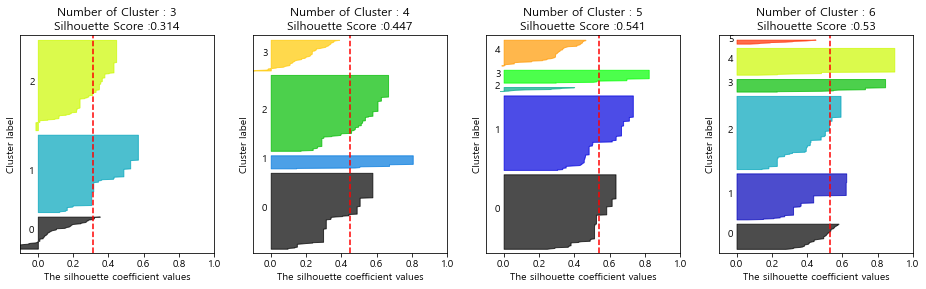

In [23]:
# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([3, 4, 5, 6], clustering_df)

In [24]:
cdf_cpy = clustering_df.copy()
clustering_df

,노인비율(%),격자 당 경로당 수,유아비율(%),격자 당 어린이 보육시설 수
0,1.573096,-0.263779,-0.765451,-0.549261
1,1.573096,-0.263779,-0.765451,-0.549261
2,1.573096,-0.263779,-0.765451,-0.549261
3,1.573096,-0.263779,-0.765451,-0.549261
4,1.573096,-0.263779,-0.765451,-0.549261
...,...,...,...,...
478,-1.416842,-0.263779,1.144370,-0.549261
479,-1.416842,-0.263779,1.144370,-0.549261
480,-1.416842,-0.263779,1.144370,-0.549261
481,-1.416842,-0.263779,1.144370,-0.549261


In [25]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(clustering_df)
cdf_cpy['kmeans_label']  = cluster_labels
#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

0 cluster 265
1 cluster 13
2 cluster 55
3 cluster 117
4 cluster 33


c:\users\jinsung\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\jinsung\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


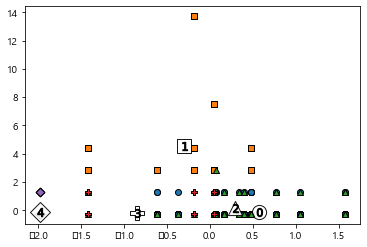

In [26]:
# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = cdf_cpy[cdf_cpy['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['노인비율(%)'], y=label_cluster['격자 당 경로당 수'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)
    print(label,'cluster',label_cluster.shape[0])

plt.show()

0 cluster 265
1 cluster 13
2 cluster 55
3 cluster 117
4 cluster 33


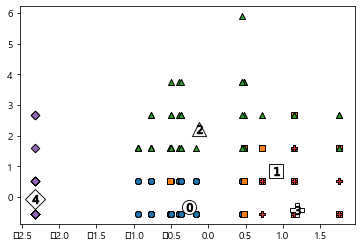

In [27]:
# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = cdf_cpy[cdf_cpy['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['유아비율(%)'], y=label_cluster['격자 당 어린이 보육시설 수'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[2], y=center_x_y[3], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[2], y=center_x_y[3], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)
    print(label,'cluster',label_cluster.shape[0])

plt.show()

0 cluster 265
1 cluster 13
2 cluster 55
3 cluster 117
4 cluster 33


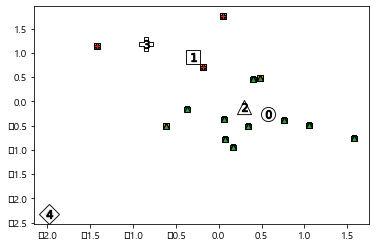

In [28]:
# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = cdf_cpy[cdf_cpy['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['노인비율(%)'], y=label_cluster['유아비율(%)'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[2], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[2], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)
    print(label,'cluster',label_cluster.shape[0])

plt.show()

0 cluster 265
1 cluster 13
2 cluster 55
3 cluster 117
4 cluster 33


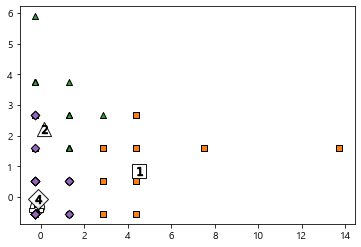

In [29]:
# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = cdf_cpy[cdf_cpy['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['격자 당 경로당 수'], y=label_cluster['격자 당 어린이 보육시설 수'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[1], y=center_x_y[3], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[1], y=center_x_y[3], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)
    print(label,'cluster',label_cluster.shape[0])

plt.show()

LinAlgError: singular matrix

c:\users\jinsung\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\jinsung\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


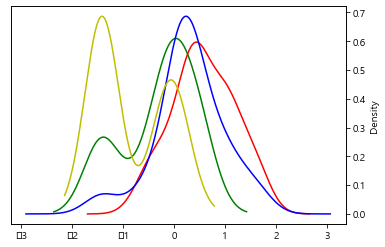

In [30]:
c0_silver_rate = cdf_cpy[cdf_cpy['kmeans_label']==0]['노인비율(%)']
c1_silver_rate = cdf_cpy[cdf_cpy['kmeans_label']==1]['노인비율(%)']
c2_silver_rate = cdf_cpy[cdf_cpy['kmeans_label']==2]['노인비율(%)']
c3_silver_rate = cdf_cpy[cdf_cpy['kmeans_label']==3]['노인비율(%)']
c4_silver_rate = cdf_cpy[cdf_cpy['kmeans_label']==4]['노인비율(%)']

ax = c0_silver_rate.plot.kde(secondary_y=True,bw_method=0.5, c='r')
c1_silver_rate.plot.kde(ax=ax,secondary_y=True,bw_method=0.5, c='g')
c2_silver_rate.plot.kde(ax=ax,secondary_y=True,bw_method=0.5, c='b')
c3_silver_rate.plot.kde(ax=ax,secondary_y=True,bw_method=0.5, c='y')
c4_silver_rate.plot.kde(ax=ax,secondary_y=True,bw_method=0.5, c='c')
plt.legend()
plt.show()

In [ ]:
print('0 cluster mean',round(c0_silver_rate.mean(),2))
print('1 cluster mean',round(c1_silver_rate.mean(),2))
print('2 cluster mean',round(c2_silver_rate.mean(),2))
print('3 cluster mean',round(c3_silver_rate.mean(),2))
print('4 cluster mean',round(c4_silver_rate.mean(),2))

In [ ]:
c0_silver_fct = cdf_cpy[cdf_cpy['kmeans_label']==0]['격자 당 경로당 수']
c1_silver_fct = cdf_cpy[cdf_cpy['kmeans_label']==1]['격자 당 경로당 수']
c2_silver_fct = cdf_cpy[cdf_cpy['kmeans_label']==2]['격자 당 경로당 수']
c3_silver_fct = cdf_cpy[cdf_cpy['kmeans_label']==3]['격자 당 경로당 수']
c4_silver_fct = cdf_cpy[cdf_cpy['kmeans_label']==4]['격자 당 경로당 수']

ax = c0_silver_fct.plot.kde(secondary_y=True,bw_method=0.5, c='r')
c1_silver_fct.plot.kde(ax=ax,secondary_y=True,bw_method=0.5, c='g')
c2_silver_fct.plot.kde(ax=ax,secondary_y=True,bw_method=0.5, c='b')
c3_silver_fct.plot.kde(ax=ax,secondary_y=True,bw_method=0.5, c='y')
c4_silver_fct.plot.kde(ax=ax,secondary_y=True,bw_method=0.5, c='c')
plt.legend()
plt.show()

print('0 cluster mean',round(c0_silver_fct.mean(),2))
print('1 cluster mean',round(c1_silver_fct.mean(),2))
print('2 cluster mean',round(c2_silver_fct.mean(),2))
print('3 cluster mean',round(c3_silver_fct.mean(),2))
print('4 cluster mean',round(c4_silver_fct.mean(),2))

In [ ]:
c0_kid_rate = cdf_cpy[cdf_cpy['kmeans_label']==0]['유아비율(%)']
c1_kid_rate = cdf_cpy[cdf_cpy['kmeans_label']==1]['유아비율(%)']
c2_kid_rate = cdf_cpy[cdf_cpy['kmeans_label']==2]['유아비율(%)']
c3_kid_rate = cdf_cpy[cdf_cpy['kmeans_label']==3]['유아비율(%)']
c4_kid_rate = cdf_cpy[cdf_cpy['kmeans_label']==4]['유아비율(%)']

ax = c0_kid_rate.plot.kde(secondary_y=True,bw_method=0.5, c='r')
c1_kid_rate.plot.kde(ax=ax,secondary_y=True,bw_method=0.5, c='g')
c2_kid_rate.plot.kde(ax=ax,secondary_y=True,bw_method=0.5, c='b')
c3_kid_rate.plot.kde(ax=ax,secondary_y=True,bw_method=0.5, c='y')
c4_kid_rate.plot.kde(ax=ax,secondary_y=True,bw_method=0.5, c='c')
plt.show()

In [ ]:
print('0 cluster mean',round(c0_kid_rate.mean(),2))
print('1 cluster mean',round(c1_kid_rate.mean(),2))
print('2 cluster mean',round(c2_kid_rate.mean(),2))
print('3 cluster mean',round(c3_kid_rate.mean(),2))
print('4 cluster mean',round(c4_kid_rate.mean(),2))

In [ ]:
c0_kid_fct = cdf_cpy[cdf_cpy['kmeans_label']==0]['격자 당 어린이 보육시설 수']
c1_kid_fct = cdf_cpy[cdf_cpy['kmeans_label']==1]['격자 당 어린이 보육시설 수']
c2_kid_fct = cdf_cpy[cdf_cpy['kmeans_label']==2]['격자 당 어린이 보육시설 수']
c3_kid_fct = cdf_cpy[cdf_cpy['kmeans_label']==3]['격자 당 어린이 보육시설 수']
c4_kid_fct = cdf_cpy[cdf_cpy['kmeans_label']==4]['격자 당 어린이 보육시설 수']

ax = c0_kid_fct.plot.kde(secondary_y=True,bw_method=0.5, c='r')
c1_kid_fct.plot.kde(ax=ax,secondary_y=True,bw_method=0.5, c='g')
c2_kid_fct.plot.kde(ax=ax,secondary_y=True,bw_method=0.5, c='b')
c3_kid_fct.plot.kde(ax=ax,secondary_y=True,bw_method=0.5, c='y')
c4_kid_fct.plot.kde(ax=ax,secondary_y=True,bw_method=0.5, c='c')
# plt.legend()
plt.show()

print('0 cluster mean',round(c0_kid_fct.mean(),2))
print('1 cluster mean',round(c1_kid_fct.mean(),2))
print('2 cluster mean',round(c2_kid_fct.mean(),2))
print('3 cluster mean',round(c3_kid_fct.mean(),2))
print('4 cluster mean',round(c4_kid_fct.mean(),2))

In [ ]:
grid['kmeans_label']=cdf_cpy['kmeans_label']

In [ ]:
grid = grid.iloc[:,1:]
grid

In [ ]:
grid['kmeans_label'].value_counts()

In [ ]:
grid.to_csv('clustered_grid.csv')

In [ ]:
# cc_GJ= gpd.GeoDataFrame.from_file('./childrencare_GwangJin/childrencare_GwangJin.shp',encoding='euc-kr')